In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("iphone15_flipkart_reviews.csv")

In [29]:
df['Name'] = df['Name'].astype(str).str.title()

In [30]:
df['Review'] = df['Review'].str.replace("READ MORE", "", case=False)

In [31]:
df.head()

,Name,Rating,Review
0,Thakur Surya Pratap Singh,5,Awesome 😎
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Rishabh Jha,5,Awesome 🔥🔥☺️
3,Ajin V,5,High quality camera😍
4,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...


In [32]:
import re

def split_into_sentences(text):
    if not isinstance(text, str):
        return []
    return re.findall(r'[^.!?]+(?:[.!?]|$)', text)

In [33]:
df['Review1'] = df['Review'].apply(split_into_sentences)

In [34]:
df.head()

,Name,Rating,Review,Review1
0,Thakur Surya Pratap Singh,5,Awesome 😎,[Awesome 😎]
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,"[Just go for it., Amazing one., Beautiful came..."
2,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️]
3,Ajin V,5,High quality camera😍,[High quality camera😍]
4,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...


In [35]:
from textblob import TextBlob

# Assuming split_into_sentences is defined elsewhere and returns a list of sentences
df['Review1'] = df['Review'].apply(split_into_sentences)

def classify_sentiment(polarity, threshold=0.1):
    if polarity >= threshold:
        return 'Positive'
    else:
        return 'Negative'

In [36]:
# Calculate polarity and subjectivity on the whole review
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [37]:
# Classify sentiment based on polarity
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

In [38]:
# Print the first 5 rows showing relevant columns
df[['Review', 'Polarity', 'Subjectivity', 'Sentiment']].head()


,Review,Polarity,Subjectivity,Sentiment
0,Awesome 😎,1.000000,1.000000,Positive
1,Just go for it.Amazing one.Beautiful camera wi...,0.266667,0.633333,Positive
2,Awesome 🔥🔥☺️,1.000000,1.000000,Positive
3,High quality camera😍,0.160000,0.540000,Positive
4,Switch from OnePlus to iPhone I am stunned wit...,1.000000,1.000000,Positive


C:\Users\wasim\AppData\Local\Temp\ipykernel_15696\59483337.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


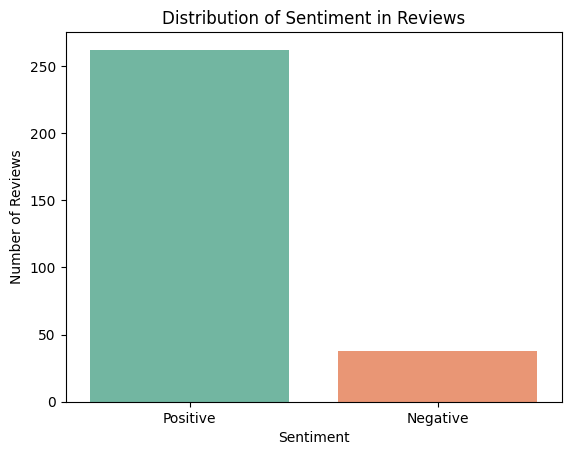

In [39]:
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()